In [2]:
import imagej

In [ ]:
ij = imagej.init(r'C:\users\michael\Fiji.app', headless=False)

In [6]:
ij.py.run_macro("""run("Blobs (25K)");""")

<org.scijava.script.ScriptModule at 0x27328190ba0 jclass=org/scijava/script/ScriptModule jself=<LocalRef obj=0x4e5b15b0 at 0x2732774f090>>

In [7]:
# Load UI and send NumPy Array
ij.ui().showUI()

In [ ]:
# Run Plugin
plugin = 'Mean'
args = { 
    'block_radius_x': 10,
    'block_radius_y': 10
}
ij.py.run_plugin(plugin, args)

# Create a window manager for interacting with the UI
import jnius
windowManager = jnius.autoclass('ij.WindowManager')

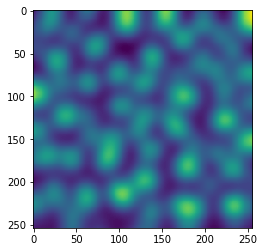

In [11]:
import matplotlib.pyplot as plt
# Get back data
results = ij.py.from_java(windowManager.getCurrentImage())
ij.py.show(results)

In [14]:
import numpy as np
newtest = np.random.rand(512, 512)

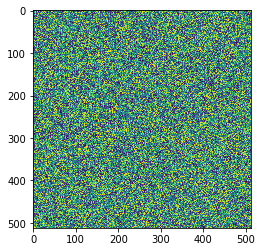

In [15]:
ij.py.show(newtest)

In [62]:
ij2img = ij.py.to_java(newtest)
ij.ui().show("Noise", ij2img)

JavaException: JVM exception occurred: net.imglib2.python.ReferenceGuardingRandomAccessibleInterval cannot be cast to net.imglib2.IterableInterval

In [42]:
ij2display = ij.display().createDisplay(ij2img)

In [44]:
from jnius import autoclass
ImagePlus = autoclass('ij.ImagePlus')
ij1img = ij.convert().convert(ij2display, ImagePlus)
print(ij1img)

<ij.ImagePlus at 0x27352022360 jclass=ij/ImagePlus jself=<LocalRef obj=0x45deab90 at 0x27352094bb0>>


In [56]:
ij.py.run_plugin(plugin, args)

<org.scijava.script.ScriptModule at 0x273521f1468 jclass=org/scijava/script/ScriptModule jself=<LocalRef obj=0x45e36900 at 0x2735387c730>>

In [61]:
ij.py.show(ij2img)

JavaException: JVM exception occurred: net.imglib2.python.ReferenceGuardingRandomAccessibleInterval cannot be cast to net.imglib2.IterableInterval

In [50]:
windowManager.setTempCurrentImage(ij1img)

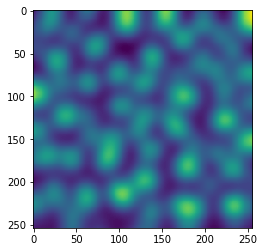

In [51]:
noise_results = ij.py.from_java(windowManager.getCurrentImage())
ij.py.show(results)

In [ ]:
display(np_Slice-results)

# Display
f, axes = plt.subplots(1,2)  # Create one subplot (1x1 grid)
(aO, aM) = axes.flatten()

aO.grid(False)
aO.imshow(np_allChannels[26,:,:,0], cmap='gray', interpolation='none')

aM.grid(False)
aM.imshow(results, cmap='gray', interpolation='none')

plt.show()